# R-squared
## Introduction
- Measure of correlation
- compare variation around mean and variation around a (trained/ fitted) line 
- A better fitted model should have less variation of the data around it

Create functions

Mean of x values
\begin{equation*}
\bar{X} = \frac{\sum_{i=1}^{n}x_i}{n} 
\end{equation*}

Mean of y values
\begin{equation*}
\bar{Y} = \frac{\sum_{i=1}^{n}y_i}{n} 
\end{equation*}

Calculate the slope of the best fit line
\begin{equation*}
\bar{m} = \frac{\sum_{i=1}^{n}(x-\bar{X})(y-\bar{Y})}{\sum_{i=1}^{n}(x-\bar{X})^2} 
\end{equation*}

Calculate the y-intercept of the line
\begin{equation*}
b = \bar{Y} - m*\bar{X}
\end{equation*}

R-squared 
\begin{equation*}
R^2 \ = \frac{Var(mean) - Var(line)}{Var(mean)} = 1 - \frac{Var(line)}{Var(mean)}
\end{equation*}

In [1]:
def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

In [3]:
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

Use in data

In [6]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

xs = np.array([1,2,3,4,5], dtype=np.float64)
ys = np.array([5,4,6,5,6], dtype=np.float64)

#https://www.quora.com/What-is-the-difference-between-linear-regression-and-least-squares
# TODO: Learn how to write the slope and gradient formula in markdown
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    b = mean(ys) - m*mean(xs)
    return m, b

    
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]

r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)



0.3214285714285714


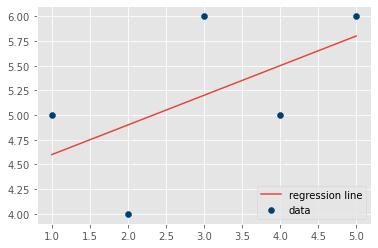

In [5]:
plt.scatter(xs,ys,color='#003F72',label='data')
plt.plot(xs, regression_line, label='regression line')
plt.legend(loc=4)
plt.show()

# References
- https://pythonprogramming.net/how-to-program-r-squared-machine-learning-tutorial/
- https://www.youtube.com/watch?v=2AQKmw14mHM&t=111s
- https://machinelearningmastery.com/linear-regression-for-machine-learning/